<a href="https://colab.research.google.com/github/BurnTheBunsen/pytorch-deep-learning-test/blob/main/Pytorch_Workflow_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
what_were_covering = {1: "data (preparing and loading)",
                      2: "build a model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
                      }
what_were_covering

{1: 'data (preparing and loading)',
 2: 'build a model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'2.8.0+cu126'

##1. Data preparing and loading
A. Get data into a numerical representation

B. Build a model to learn patterns in that numerical representation

In [10]:
# Create a known parameter
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# Why is X capital here? because it is typically a matrix or a tensor
X =  torch.arange(start, end, step).unsqueeze(dim=1) # This is our input
y = weight * X + bias # This is our ideal output
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

# Splitting data into training and test sets (one of the most impotant conceptst in ML in general)
So we have 3 sets of data:
1. Training set 60~80%
2. Validation set (You dont always use this one) 10~20%
3. Test set 10~20%

In [11]:
#Create a train/test split
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [12]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

# How can we better visualize our data?

In [15]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot training data in blue
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size: 14"});

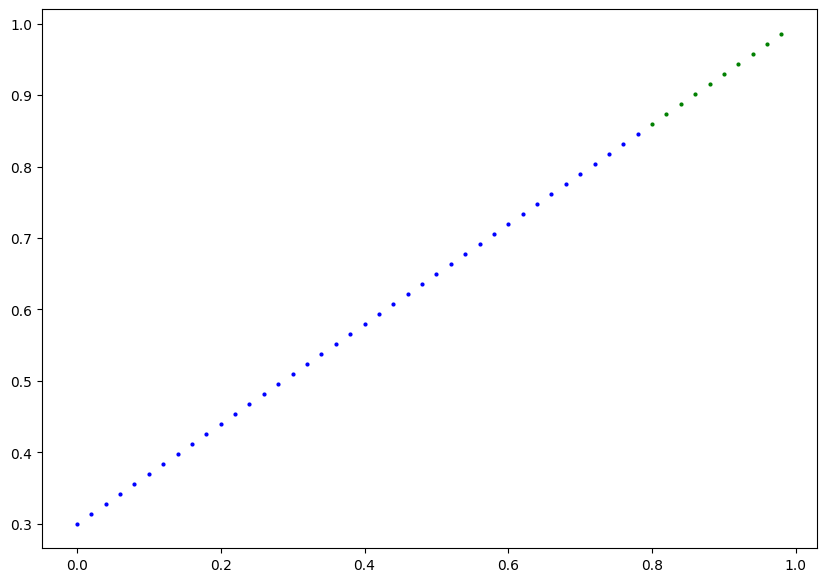

In [16]:
plot_predictions()

## 2. Build model

Our first PyTorch model


In [17]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    #"requires_grad=True" just tells pytorch that this parameter
    #is supposed to be updated via
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias #This is the linear regression formula


### PyTorch model building essentials

* torch.nn -> Contains all of the buildings for computational graphs
* torch.nn.Parameter -> What params should our model try and Learn
* torch.nn.Module -> The base class for all NN modules, if you subclass it you should overwrite forward()
* torch.optim -> This is where the optimizers live and they will help with Gradian Descent
* def forward() -> All nn.Module subclasses require you to overwrite forward()

### PyTorch Workflow
1. Get data ready
 * torchvision.tranforms
 * torch.utils.data.Dataset
 * torch.utils.data.DataLoader
2. Build or pick a model
  * torch.nn
  * torch.nn.Module
  * torchvision.models
3. Fit the model to the data and make a prediction

4. Evaluate the model
  * torchmetrics
5. Improve through experimentation
  * torch.utils.tensorboard
6. Save and reload your trained model


### Checking the contents of out PyTorch model

Now we've created a model, lets see whats inside.

So we can check our model parameters or whats inside using `.parameters()`

In [18]:
# Create a random seed
torch.manual_seed(42)

# Create a model instance
model_0 = LinearRegressionModel()

# Check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])